**[CS523.N11] - TEAM 9**
# DEMO HUẤN LUYỆN CÂY QUYẾT ĐỊNH HỒI QUY

- Trong DEMO này, Nhóm 9 thực hiện việc huấn luyện 1 mô hình Cây Quyết định Hồi quy sử dụng độ đo **Mean Square Error** để đánh giá việc chia dữ liệu.

- Bộ dữ liệu được dùng có tên là ***Possum Regression***: gồm dữ liệu về các thuộc tính của loài ***Chồn Túi***.
  - Chứa 104 điểm dữ liệu.
  - 14 cột dữ liệu, bao gồm:
    - ***case*** (Số quan sát): [1,104]
    - ***site*** (Mã số khu vực Chồn bị dính bẫy): [1,7]
    - ***Pop*** (Nơi trú ngụ) : Vic, other.
    - ***sex*** (Giới tính) : m (male), f (female).
    - ***age*** (Độ Tuổi) : số Nguyên Dương.
    - ***hdlngth*** (Chiều dài phần đầu tính theo milimet) : số Thực.
    - ***skullw*** (Chiều ngang hộp sọ, tính theo milimét) : số Thực.
    - ***totlngth*** (Chiều dài toàn thân, tính theo centimet) : số Thực.
    - ***taill*** (Chiều dài phần đuôi, tính theo centimet) : số Thực.
    - ***footlgth*** (Chiều dài bàn chân, tính theo milimet) : số Thực.

- **BÀI TOÁN: Dự đoán tuổi (Age) của con Chuột Túi dựa trên các thông số có trong dataset "Possum Regression".**

- Các công cụ huấn luyện mô hình được lấy từ thư viện Scikit-Learn.

## Khai báo thư viện

In [137]:
#!pip install category_encoders

In [138]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.tree import DecisionTreeRegressor # Công cụ train Cây Quyết định Phân loại
from sklearn.model_selection import train_test_split # Chia dataset thành train-test
from sklearn.metrics import mean_squared_error # Kiểm tra các chỉ số của Model

import matplotlib.pyplot as plt # data visualization
import graphviz # Biểu diễn Modle ở dạng đồ thị

%matplotlib inline

## Nhập bộ dữ liệu

In [139]:
data = '/content/possum.csv'
df = pd.read_csv(data)

## EDA

In [140]:
# Xem hình dạng của bộ dữ liệu
df.shape

(104, 14)

In [141]:
# Xem trước 5 dòng đầu tiên
df.head(5)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [142]:
# Xem thông tin tổng hợp của dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [143]:
# Có 2 Điểm Quan sát bị thiếu dữ liệu (NA value), nên sẽ loại bỏ 2 diêm83 quan sát đó đi
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


## Tạo dataset cho việc huấn luyện Decision Tree

In [144]:
'''
Chúng ta sẽ loại bỏ một số thuộc tính không liên quan nhiểu đến việc đo đạc, ước tính.
'''
# Chia thành các biến thành phần (X) và biến mục tiêu (y)
X = df.drop(["case", "site", "Pop", "sex", "age"], axis=1) # Loại bỏ các thuộc tính không cần thiết

y = df["age"] # Biến mục tiêu

In [145]:
# Chia X,y thành tập train - test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((80, 9), (21, 9))

In [146]:
X_train

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
92,89.2,54.0,82.0,38.0,63.8,44.9,12.8,24.0,31.0
26,90.5,54.5,85.0,35.0,70.3,50.8,14.2,23.0,28.0
44,90.7,55.9,81.0,34.0,71.5,54.0,14.6,27.0,31.5
73,88.7,52.0,83.0,38.0,61.5,45.9,14.7,26.0,34.0
15,91.6,56.0,86.0,34.5,73.0,51.4,14.4,28.0,32.0
...,...,...,...,...,...,...,...,...,...
63,96.9,56.5,89.5,38.5,63.0,45.1,17.1,25.5,33.0
74,93.8,58.1,89.0,38.0,66.2,45.6,16.9,26.0,33.5
14,92.9,57.6,85.5,34.0,69.7,51.8,15.7,28.0,35.0
95,94.8,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0


In [147]:
X_test

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
87,89.6,58.0,87.5,38.0,66.7,43.5,16.0,25.5,31.5
58,102.5,62.8,96.0,40.0,73.2,44.5,14.7,32.0,36.0
69,91.9,56.4,87.0,38.0,65.4,44.1,13.0,27.0,34.0
70,92.8,57.6,90.0,40.0,65.7,42.8,15.0,27.5,34.0
48,95.4,59.2,85.0,37.0,69.0,45.0,15.9,29.5,35.5
39,91.0,55.0,84.5,36.0,72.8,51.4,13.6,27.0,30.0
22,92.5,56.1,89.0,36.0,72.8,53.3,15.4,28.0,35.0
47,98.6,63.2,85.0,34.0,66.9,44.9,17.0,28.0,35.0
10,93.3,57.2,89.5,39.0,77.2,51.3,14.9,31.0,34.0
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0


## Tiến hành huấn luyện Cây Quyết định Hồi quy

In [155]:
# Khởi tạo model với tham số criterion là 'entropy'
dt_rgsr = DecisionTreeRegressor(criterion='squared_error', random_state=1)

# Tiến hành huấn luyện model (Fit the model)
dt_rgsr.fit(X_train, y_train)

# Cho model dự đoán trên tập test
y_pred = dt_rgsr.predict(X_test)

# Kiểm tra độ chính xác của model trên tập test
print('MSE trên tập test: {0:0.4f}'. format(mean_squared_error(y_test, y_pred)))

MSE trên tập test: 2.3333


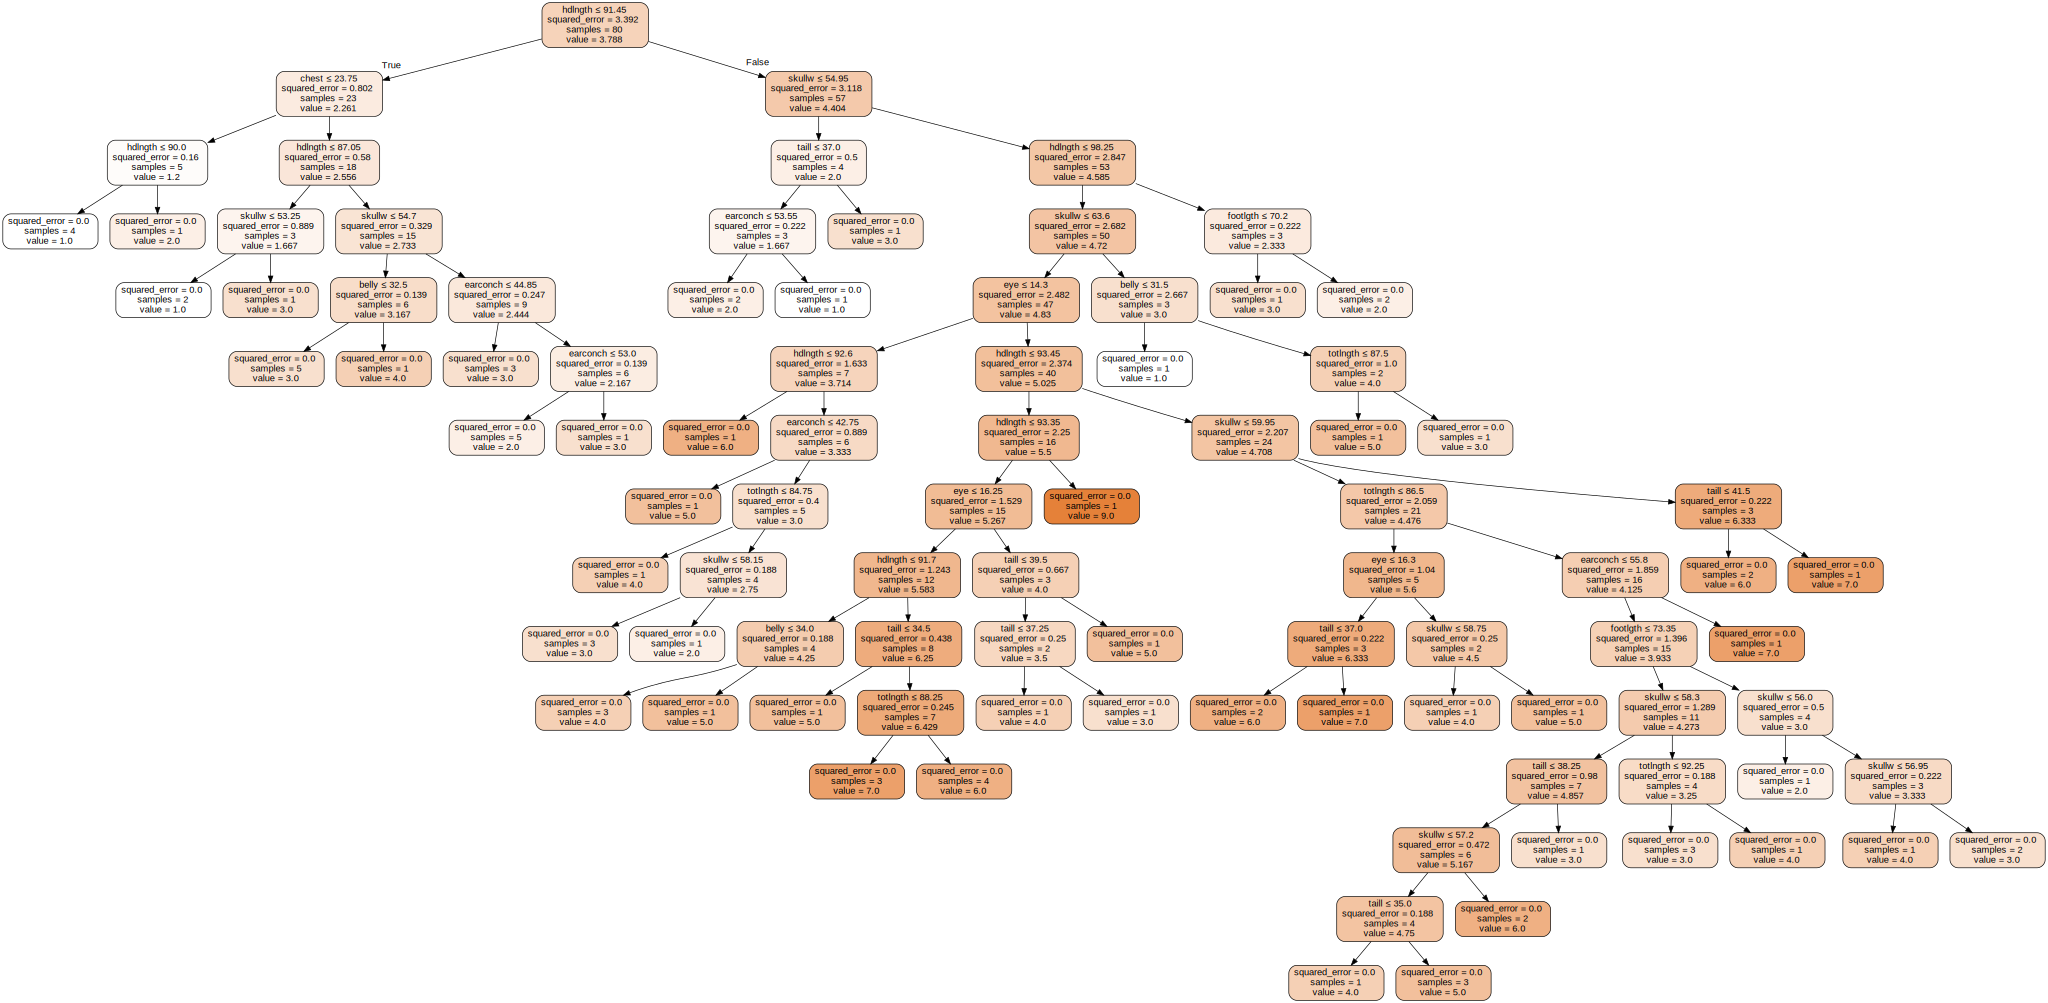

In [156]:
# Biểu diễn Cây ở dạng đồ thị
from sklearn import tree

tree_data = tree.export_graphviz(dt_rgsr, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(tree_data) 

graph

In [157]:
# DỰ ĐOÁN THỬ ĐỘ TUỔI CỦA 1 CON CHỒN TÚI!
  # hdlngth = 92.4
  # skullw = 56.0
  # totlngth = 80.5
  # taill = 35.5
  # footlgth = 68.4
  # earconch = 49.5
  # eye = 15.9
  # chest = 27.0
  # belly = 30.0
prediction = dt_rgsr.predict([[92.4, 56.0, 80.5, 35.5, 68.4, 49.5, 15.9, 27.0, 30.0]])
print("PREDICTED AGE IS", int(prediction[0]))

PREDICTED AGE IS 7


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
